In [1]:
__authors__ = "Akshay Agarwal, Manish Das, Jaro Habr, Parag Kanade"
__version__ = "XCS229ii, Stanford, Spring 2021"

# Melanoma Detection Dataset

In [38]:
%load_ext autoreload
%autoreload 2

In [4]:
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")

print(os.getcwd())

/Users/jh/ai/courses/stanford/3-ML_RL/final_project/xcs229ii_final_project/code


In [6]:
import os
from constants import TRAIN_DIR, VALIDATION_DIR, TEST_DIR

TRAIN_PATH = os.path.join(TRAIN_DIR, "images")
TRAIN_MASK_PATH = os.path.join(TRAIN_DIR, "masks")
VALIDATION_PATH = os.path.join(VALIDATION_DIR, "images")
VALIDATION_MASK_PATH = os.path.join(VALIDATION_DIR, "masks")
TEST_PATH = os.path.join(TEST_DIR, "images")
TEST_MASK_PATH = os.path.join(TEST_DIR, "masks")

## Image Analysis

### Image & Masks

Let's count the images and masks for train, validation and test to see their distribution.

In [8]:
import glob

train_images_count = len(sorted(glob.glob(os.path.join(TRAIN_PATH, "*.jpg"))))
train_masks_count = len(sorted(glob.glob(os.path.join(TRAIN_MASK_PATH, "*.png"))))
validation_images_count = len(sorted(glob.glob(os.path.join(VALIDATION_PATH, "*.jpg"))))
validation_masks_count = len(sorted(glob.glob(os.path.join(VALIDATION_MASK_PATH, "*.png"))))
test_images_count = len(sorted(glob.glob(os.path.join(TEST_PATH, "*.jpg"))))
test_masks_count = len(sorted(glob.glob(os.path.join(TEST_MASK_PATH, "*.png"))))

total_images_count = train_images_count + validation_images_count + test_images_count

train_images_percentage = round(train_images_count / total_images_count * 100, 2)
validation_images_percentage = round(validation_images_count / total_images_count * 100, 2)
test_images_percentage = round(test_images_count / total_images_count * 100, 2)

print(f"train images: {train_images_count}")
print(f"train masks: {train_masks_count}")
print(f"validation images: {validation_images_count}")
print(f"validation masks: {validation_masks_count}")
print(f"test images: {test_images_count}")
print(f"test masks: {test_images_count}")
print()
print(f"total: {total_images_count}")
print()
print(f"train %: {train_images_percentage}")
print(f"validation %: {validation_images_percentage}")
print(f"test %: {test_images_percentage}")

train images: 2700
train masks: 2700
validation images: 300
validation masks: 300
test images: 300
test masks: 300

total: 3300

train %: 81.82
validation %: 9.09
test %: 9.09


### Image Distribution Graphs

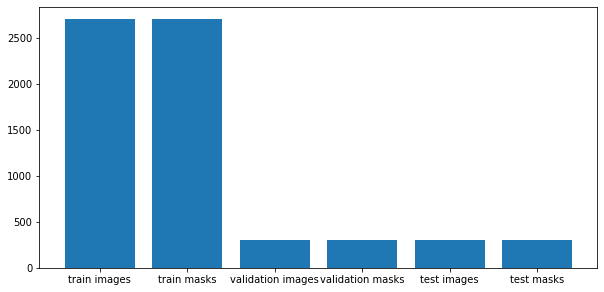

In [9]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from constants import PROJECT_DIR

data = {
    "train images": train_images_count,
    "train masks": train_masks_count,
    "validation images": validation_images_count,
    "validation masks": validation_masks_count,
    "test images": test_images_count,
    "test masks": test_masks_count
}

with PdfPages(os.path.join(PROJECT_DIR, "figures", "image_distribution.pdf")) as pdf:
    plt.figure(figsize=(10, 4.8))
    plt.bar(*zip(*data.items()))
    pdf.savefig(bbox_inches='tight')
    plt.show()

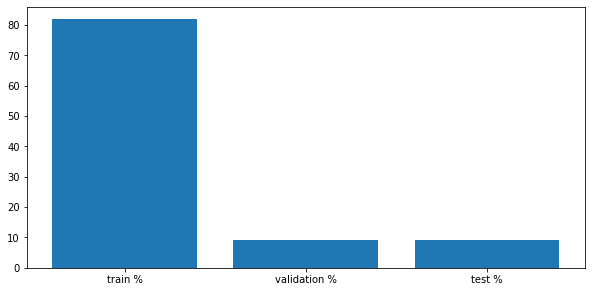

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

data = {
    "train %": train_images_percentage,
    "validation %": validation_images_percentage,
    "test %": test_images_percentage
}

with PdfPages(os.path.join(PROJECT_DIR, "figures", "image_distribution_percentage.pdf")) as pdf:
    plt.figure(figsize=(10, 4.8))
    plt.bar(*zip(*data.items()))
    pdf.savefig(bbox_inches='tight')
    plt.show()

## Draw Image and Countour

In [11]:
image_id = "ISIC_0000000"

file_name = f"{image_id}.jpg"
file_mask_name = f"{image_id}_segmentation.png"

image_path = os.path.join(TRAIN_PATH, file_name)
image_mask_path = os.path.join(TRAIN_MASK_PATH, file_mask_name)

### Draw Image and Mask

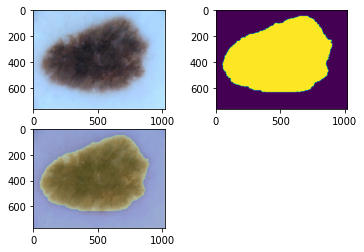

In [12]:
from PIL import Image

image = Image.open(image_path)
mask = Image.open(image_mask_path)

plt.figure()
 
plt.subplot(221)
plt.imshow(image)
 
plt.subplot(222)
plt.imshow(mask)
 
plt.subplot(223)
plt.imshow(image)
plt.imshow(mask, alpha=0.25)
 
plt.show()

### Draw Contour

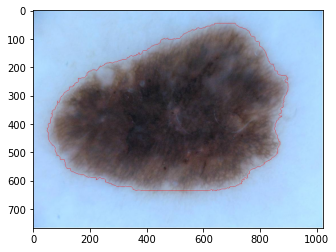

In [13]:
import cv2
import numpy as np

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
mask = cv2.imread(image_mask_path, cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 1)

image = image[:, :, ::-1]
image[..., 2] = np.where(mask == 1, 255, image[..., 2])

plt.imshow(image)
plt.show()

## Images Sizes

Let's look at the different images formats and sizes.

In [14]:
import glob
from collections import OrderedDict


def image_shapes(path, file_extention):
    shapes = {}

    image_names = sorted(glob.glob(os.path.join(path, file_extention)))

    for image_name in image_names:
        image = cv2.imread(image_name, cv2.IMREAD_COLOR)
        shape = image.shape[:-1]
        key = str(shape)
        if key in shapes.keys():
            shapes[key] += 1
        else:
            shapes[key] = 1

    return OrderedDict(sorted(shapes.items(), key=lambda x: x[1], reverse=True))

### Training Set

Let's look at the different shapes of the train images and masks

In [15]:
%%time

train_image_shapes = image_shapes(TRAIN_PATH, '*.jpg')
print()
print(f"different shapes: {len(train_image_shapes)}")
train_image_shapes

CPU times: user 6min 35s, sys: 21.4 s, total: 6min 56s
Wall time: 7min 7s

different shapes: 195


OrderedDict([('(2848, 4288)', 571),
             ('(768, 1024)', 548),
             ('(2000, 3008)', 380),
             ('(2592, 3872)', 133),
             ('(2016, 3024)', 105),
             ('(2304, 3072)', 83),
             ('(576, 767)', 66),
             ('(1536, 2048)', 64),
             ('(1129, 1504)', 54),
             ('(802, 919)', 52),
             ('(1936, 2592)', 33),
             ('(4439, 6668)', 33),
             ('(4439, 6688)', 32),
             ('(480, 640)', 29),
             ('(4439, 6708)', 22),
             ('(767, 1022)', 20),
             ('(4459, 6688)', 20),
             ('(719, 824)', 19),
             ('(4439, 6648)', 19),
             ('(1536, 2304)', 16),
             ('(4459, 6668)', 14),
             ('(4419, 6648)', 10),
             ('(4420, 6642)', 10),
             ('(4419, 6628)', 9),
             ('(4420, 6641)', 9),
             ('(4422, 6642)', 8),
             ('(4459, 6708)', 8),
             ('(4419, 6688)', 8),
             ('(542, 722)', 7)

<ipython-input-36-433e4a896f6a>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.set_minor_locator(MultipleLocator(10))


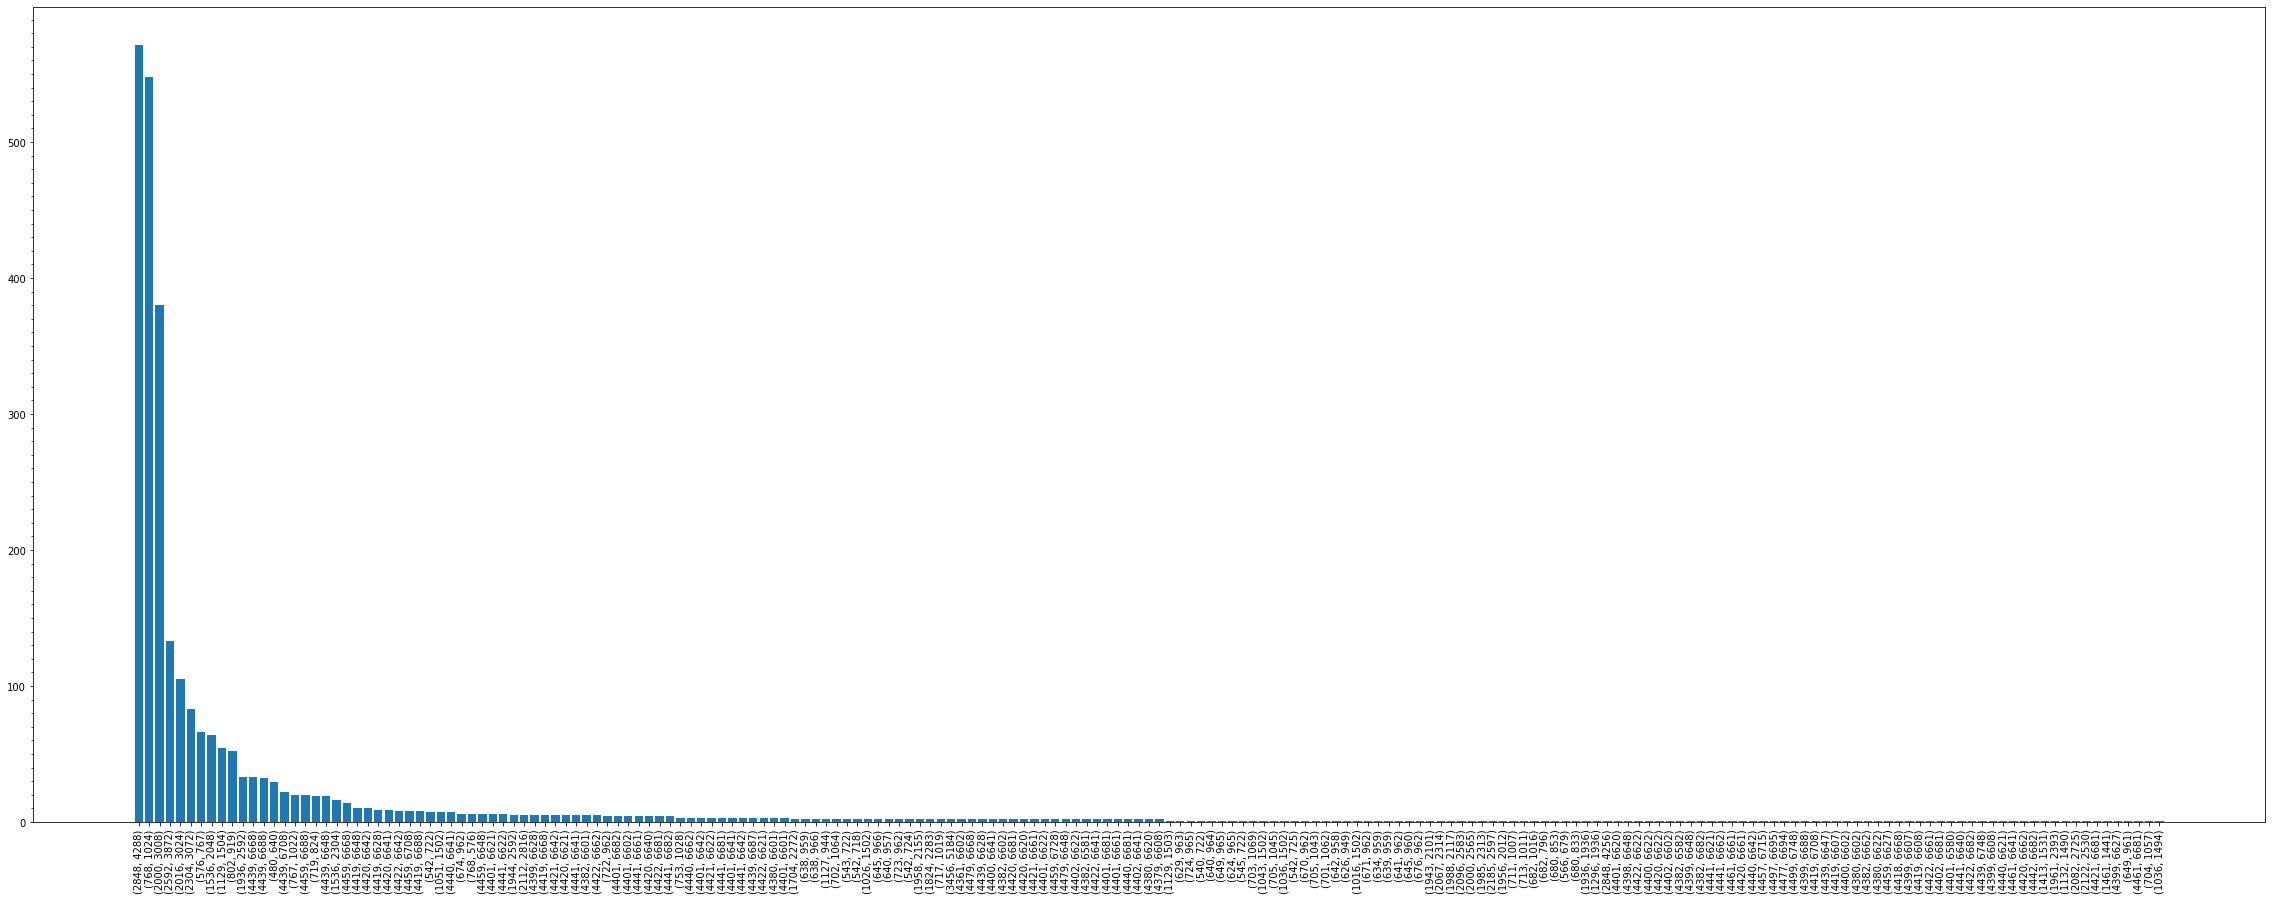

In [36]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator

with PdfPages(os.path.join(PROJECT_DIR, "figures", "train_image_resolutions.pdf")) as pdf:
    plt.figure(figsize=(40, 15))
    plt.bar(*zip(*train_image_shapes.items()))
    plt.xticks(rotation=90)
    plt.axes().yaxis.set_minor_locator(MultipleLocator(10))
    pdf.savefig(bbox_inches='tight')
    plt.show()

In [18]:
%%time

train_mask_shapes = image_shapes(TRAIN_MASK_PATH, '*.png')
print()
print(f"different shapes: {len(train_mask_shapes)}")
train_mask_shapes

CPU times: user 2min 12s, sys: 15.2 s, total: 2min 27s
Wall time: 2min 32s

different shapes: 195


OrderedDict([('(2848, 4288)', 571),
             ('(768, 1024)', 548),
             ('(2000, 3008)', 380),
             ('(2592, 3872)', 133),
             ('(2016, 3024)', 105),
             ('(2304, 3072)', 83),
             ('(576, 767)', 66),
             ('(1536, 2048)', 64),
             ('(1129, 1504)', 54),
             ('(802, 919)', 52),
             ('(1936, 2592)', 33),
             ('(4439, 6668)', 33),
             ('(4439, 6688)', 32),
             ('(480, 640)', 29),
             ('(4439, 6708)', 22),
             ('(767, 1022)', 20),
             ('(4459, 6688)', 20),
             ('(719, 824)', 19),
             ('(4439, 6648)', 19),
             ('(1536, 2304)', 16),
             ('(4459, 6668)', 14),
             ('(4419, 6648)', 10),
             ('(4420, 6642)', 10),
             ('(4419, 6628)', 9),
             ('(4420, 6641)', 9),
             ('(4422, 6642)', 8),
             ('(4459, 6708)', 8),
             ('(4419, 6688)', 8),
             ('(542, 722)', 7)

In [19]:
assert train_image_shapes == train_mask_shapes

In [20]:
max_resultion = max(train_image_shapes)
print(f"max resolution: {max_resultion}")
min_resultion = min(train_image_shapes)
print(f"min resolution: {min_resultion}")

max resolution: (802, 919)
min resolution: (1016, 1502)


### Validation Set

Let's look at the different shapes of the validation images and masks

In [27]:
%%time

validation_image_shapes = image_shapes(VALIDATION_PATH, '*.jpg')
print()
print(f"different shapes: {len(validation_image_shapes)}")
validation_image_shapes


different shapes: 58
CPU times: user 41.7 s, sys: 2.85 s, total: 44.6 s
Wall time: 46.1 s


OrderedDict([('(768, 1024)', 67),
             ('(2848, 4288)', 55),
             ('(2000, 3008)', 49),
             ('(2592, 3872)', 16),
             ('(2304, 3072)', 12),
             ('(1536, 2048)', 9),
             ('(2016, 3024)', 9),
             ('(1129, 1504)', 7),
             ('(1936, 2592)', 6),
             ('(576, 767)', 4),
             ('(802, 919)', 3),
             ('(4439, 6668)', 3),
             ('(4439, 6648)', 3),
             ('(480, 640)', 3),
             ('(1944, 2592)', 2),
             ('(674, 962)', 2),
             ('(1051, 1502)', 2),
             ('(719, 824)', 2),
             ('(4419, 6648)', 2),
             ('(4459, 6688)', 2),
             ('(4399, 6608)', 2),
             ('(4422, 6642)', 2),
             ('(4459, 6708)', 2),
             ('(1536, 2304)', 2),
             ('(542, 722)', 1),
             ('(720, 964)', 1),
             ('(1036, 1494)', 1),
             ('(723, 957)', 1),
             ('(2122, 2530)', 1),
             ('(753, 1028)

<ipython-input-37-b8e7f72b847b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.set_minor_locator(MultipleLocator(10))


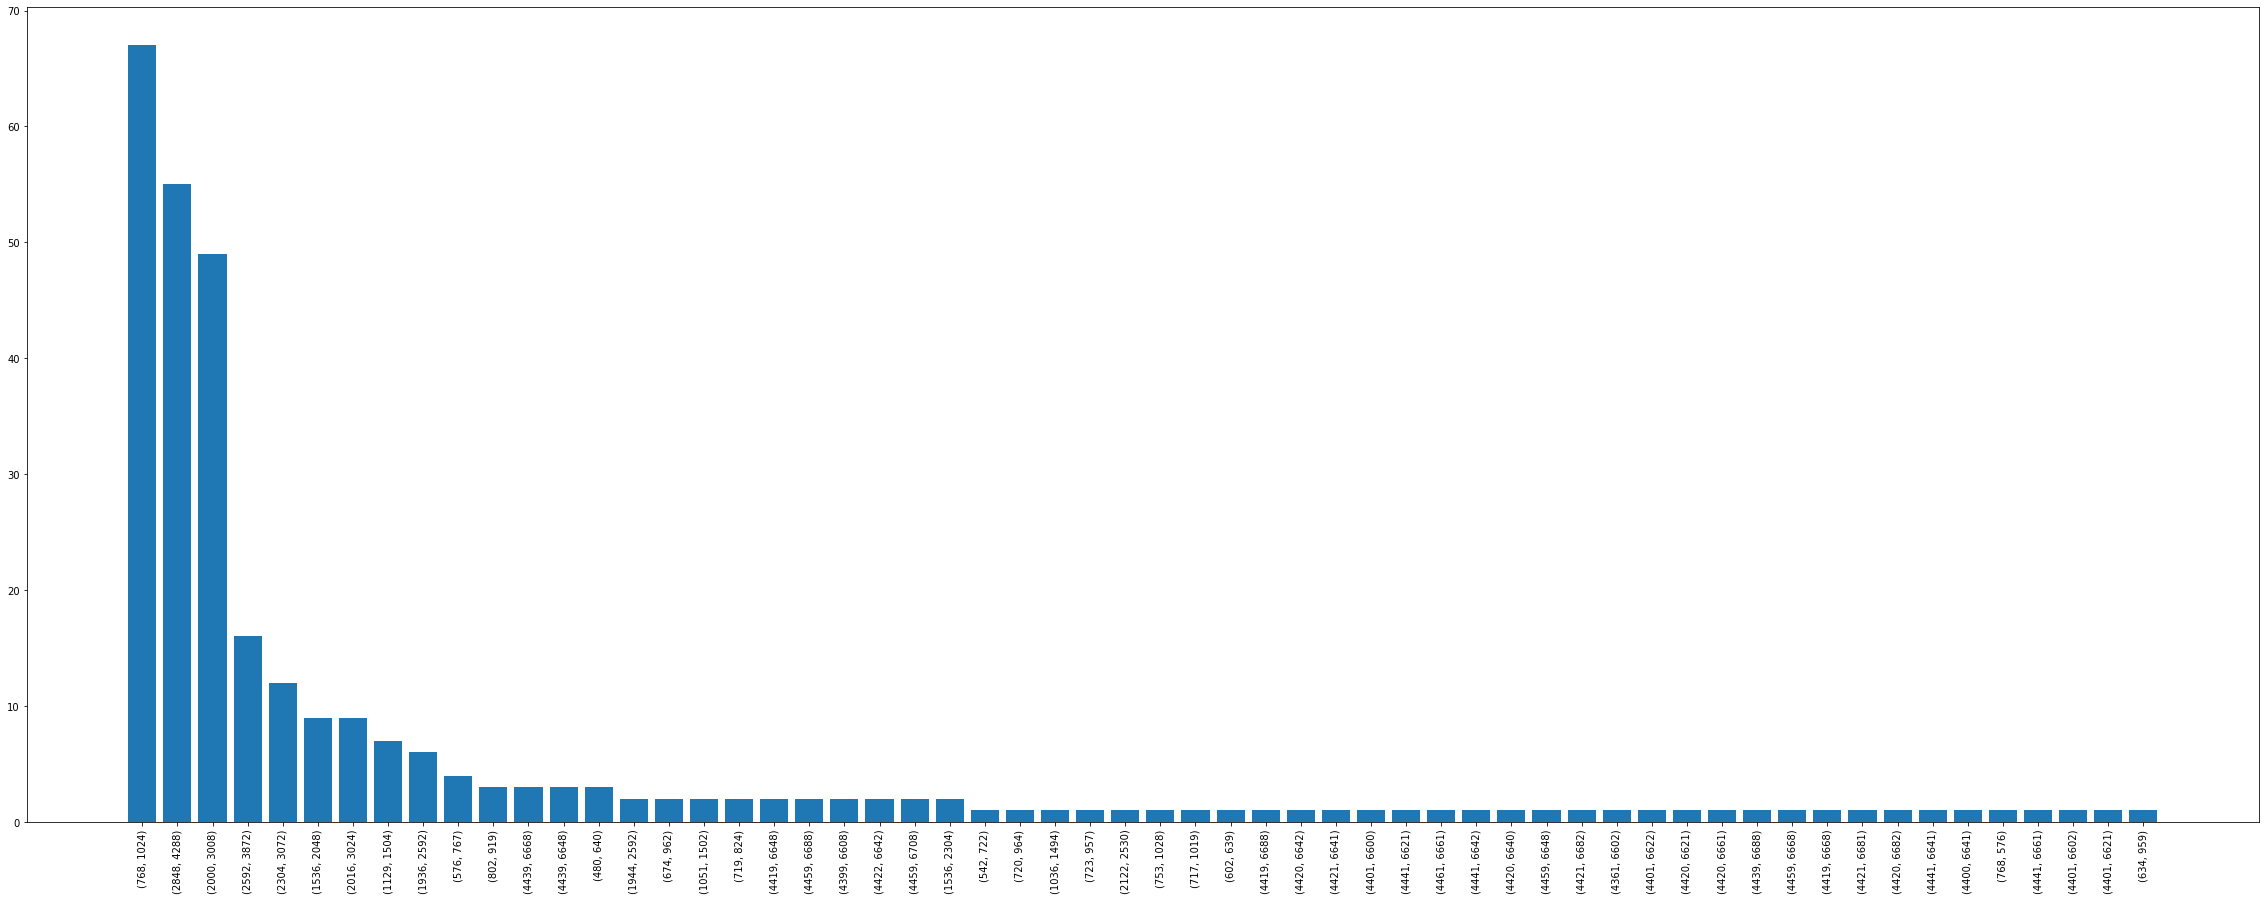

In [37]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator

with PdfPages(os.path.join(PROJECT_DIR, "figures", "valid_image_resolutions.pdf")) as pdf:
    plt.figure(figsize=(40, 15))
    plt.bar(*zip(*validation_image_shapes.items()))
    plt.xticks(rotation=90)
    plt.axes().yaxis.set_minor_locator(MultipleLocator(10))
    pdf.savefig(bbox_inches='tight')
    plt.show()

In [29]:
%%time

validation_mask_shapes = image_shapes(VALIDATION_MASK_PATH, '*.png')
print()
print(f"different shapes: {len(validation_mask_shapes)}")
validation_mask_shapes


different shapes: 58
CPU times: user 13.8 s, sys: 1.96 s, total: 15.7 s
Wall time: 16.3 s


OrderedDict([('(768, 1024)', 67),
             ('(2848, 4288)', 55),
             ('(2000, 3008)', 49),
             ('(2592, 3872)', 16),
             ('(2304, 3072)', 12),
             ('(1536, 2048)', 9),
             ('(2016, 3024)', 9),
             ('(1129, 1504)', 7),
             ('(1936, 2592)', 6),
             ('(576, 767)', 4),
             ('(802, 919)', 3),
             ('(4439, 6668)', 3),
             ('(4439, 6648)', 3),
             ('(480, 640)', 3),
             ('(1944, 2592)', 2),
             ('(674, 962)', 2),
             ('(1051, 1502)', 2),
             ('(719, 824)', 2),
             ('(4419, 6648)', 2),
             ('(4459, 6688)', 2),
             ('(4399, 6608)', 2),
             ('(4422, 6642)', 2),
             ('(4459, 6708)', 2),
             ('(1536, 2304)', 2),
             ('(542, 722)', 1),
             ('(720, 964)', 1),
             ('(1036, 1494)', 1),
             ('(723, 957)', 1),
             ('(2122, 2530)', 1),
             ('(753, 1028)

In [30]:
assert validation_image_shapes == validation_mask_shapes

In [31]:
max_resultion = max(validation_image_shapes)
print(f"max resolution: {max_resultion}")
min_resultion = min(validation_image_shapes)
print(f"min resolution: {min_resultion}")

max resolution: (802, 919)
min resolution: (1036, 1494)


### Test Set

Let's look at the different shapes of the test images. No masks are available for the test set.

In [32]:
%%time

test_image_shapes = image_shapes(TEST_PATH, '*.jpg')
print()
print(f"different shapes: {len(test_image_shapes)}")
test_image_shapes

CPU times: user 42.8 s, sys: 2.53 s, total: 45.3 s
Wall time: 46.4 s

different shapes: 64


OrderedDict([('(768, 1024)', 67),
             ('(2848, 4288)', 60),
             ('(2000, 3008)', 45),
             ('(2304, 3072)', 12),
             ('(1536, 2048)', 10),
             ('(802, 919)', 8),
             ('(2592, 3872)', 8),
             ('(576, 767)', 7),
             ('(2016, 3024)', 7),
             ('(767, 1022)', 5),
             ('(1536, 2304)', 4),
             ('(4439, 6688)', 4),
             ('(1936, 2592)', 3),
             ('(4439, 6668)', 3),
             ('(480, 640)', 3),
             ('(1129, 1504)', 2),
             ('(1704, 2272)', 2),
             ('(4401, 6642)', 2),
             ('(4439, 6708)', 2),
             ('(4459, 6688)', 2),
             ('(649, 961)', 1),
             ('(705, 1079)', 1),
             ('(707, 1057)', 1),
             ('(704, 1057)', 1),
             ('(1051, 1502)', 1),
             ('(1018, 1456)', 1),
             ('(674, 962)', 1),
             ('(672, 964)', 1),
             ('(723, 959)', 1),
             ('(2082, 2725)'

<ipython-input-33-4fd121836344>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.set_minor_locator(MultipleLocator(10))


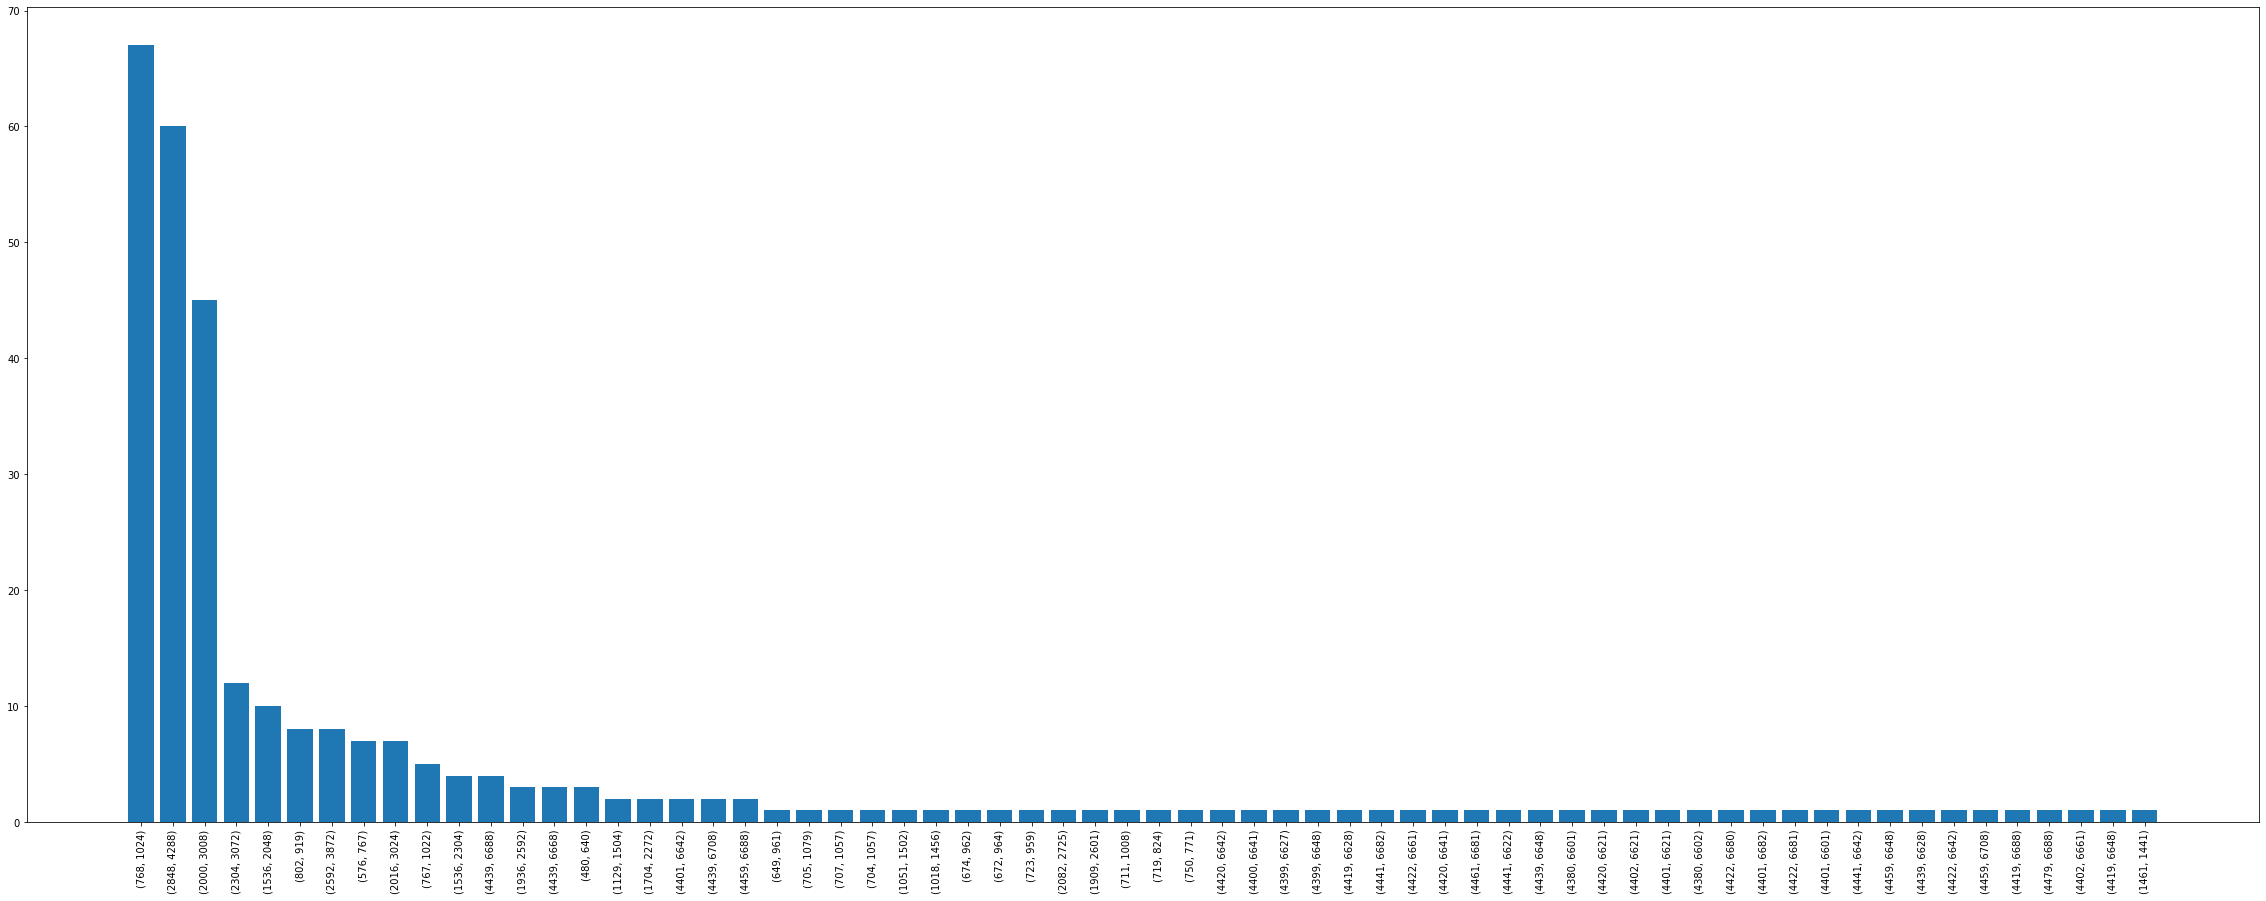

In [33]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator

with PdfPages(os.path.join(PROJECT_DIR, "figures", "test_image_resolutions.pdf")) as pdf:
    plt.figure(figsize=(40, 15))
    plt.bar(*zip(*test_image_shapes.items()))
    plt.xticks(rotation=90)
    plt.axes().yaxis.set_minor_locator(MultipleLocator(10))
    pdf.savefig(bbox_inches='tight')
    plt.show()

In [34]:
max_resultion = max(test_image_shapes)
print(f"max resolution: {max_resultion}")
min_resultion = min(test_image_shapes)
print(f"min resolution: {min_resultion}")

max resolution: (802, 919)
min resolution: (1018, 1456)
